In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
#from lifetimes import BetaGeoFitter
#from lifetimes.plotting import plot_period_transactions
#from lifetimes import GammaGammaFitter

from datetime import datetime
#import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 400)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.mode.chained_assignment = None

In [2]:
df_read = pd.read_excel(r"C:\Users\Yağız Esmerligil\Desktop\SuperStoreNewLTV.xlsx")

In [3]:
df = df_read.copy()
df.shape

(793, 21)

In [5]:
#Çalıştırmadım
today_date = dt.datetime(2018, 1, 1)
today_date

datetime.datetime(2018, 1, 1, 0, 0)

In [6]:
df["Recency_Monthly"] = df["AvgRecency"]/30
df.head(50)

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly
0,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,6.20
1,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,0.70
2,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,8.70
3,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,1.90
4,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,13.90
5,AB-10060,2015-09-18,2017-11-06,780,836,28,56,8,182,3282,3264,58752,166,2996,3,4,5,18,324,NaN,NaN,1.87
6,AB-10105,2014-12-20,2017-11-19,1065,1108,37,43,10,269,5394,5381,107620,233,4666,4,5,5,20,400,NaN,NaN,1.43
7,AB-10150,2014-03-05,2017-11-19,1355,1398,46,43,5,80,969,961,11532,77,924,4,2,2,12,144,NaN,NaN,1.43
8,AB-10165,2014-11-16,2017-12-05,1115,1142,38,27,8,79,1114,1089,15246,72,1014,5,4,2,14,196,NaN,NaN,0.90
9,AB-10255,2014-07-22,2017-07-17,1091,1259,42,168,9,65,916,904,12656,57,801,2,5,1,14,196,NaN,NaN,5.60


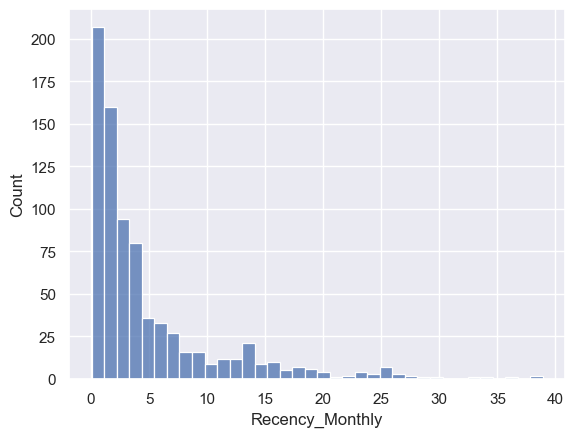

In [7]:
sns.set_theme(font_scale=1)
sns.histplot(x=df["Recency_Monthly"]); #Finding out the churn month. 

In [8]:
ms = df["CustomerID"].nunique() # # of customers
ms

793

In [9]:
cs = df[df["Recency_Monthly"]>4].shape[0] # total amounts of churn
cs

273

In [11]:
churn = (cs/ms) # percentage of churn
churn

0.3442622950819672

In [12]:
df["Churn"] = df["Recency_Monthly"]
df.head()

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn
0,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,6.20,6.20
1,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,0.70,0.70
2,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,8.70,8.70
3,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,1.90,1.90
4,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,13.90,13.90


In [13]:
df["Churn"] = df["Churn"].apply(lambda x :1 if x>4 else 0 ) #If customers' recency values are more than 4 months we specify them as churned customers

In [16]:
df["Churn"].value_counts()

Churn
0    520
1    273
Name: count, dtype: int64

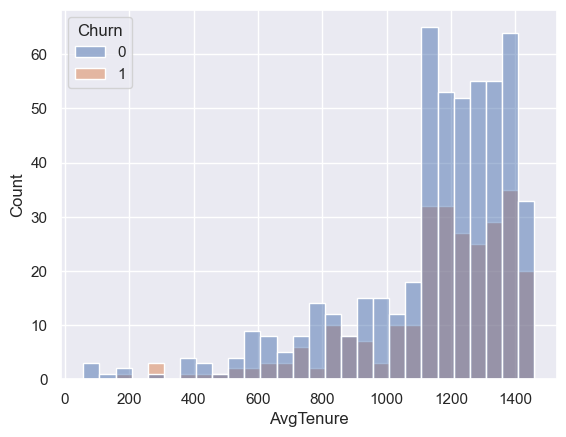

In [17]:
sns.histplot(data=df, x="AvgTenure", hue="Churn");

In [18]:
LT = 1/churn
LT # Finding out Lifetime

2.9047619047619047

In [20]:
value = df["TotalMonetary"] / ms
LTV = LT*value
df["LTV"] = LTV
df.head() # Finding Out Lifetime Value

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV
0,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,6.20,1,104.44
1,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,0.70,0,57.53
2,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,8.70,1,78.46
3,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,1.90,0,288.59
4,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,13.90,1,19.47


In [21]:
#df[df["SEGMENT"]=="At Risk"][["Churn"]].mean()

In [22]:
#df[df["SEGMENT"]=="Hibernating"]["Churn"].mean()

In [23]:
#df[df["SEGMENT"]=="Can Not Lose"]["Churn"].mean()

In [24]:
#pd.crosstab(df["SEGMENT"],df["Churn"])

# Extra Analysis and Feature Engineering

In [25]:
cltv_df = pd.DataFrame()

In [26]:
df.shape

(793, 24)

In [27]:
cltv_df.shape

(0, 0)

In [28]:
df.head()

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV
0,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,6.20,1,104.44
1,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,0.70,0,57.53
2,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,8.70,1,78.46
3,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,1.90,0,288.59
4,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,13.90,1,19.47


In [29]:
cltv_df = df.copy()
cltv_df.head()
cltv_df.shape

(793, 24)

In [30]:
cltv_df.head() 

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV
0,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,6.20,1,104.44
1,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,0.70,0,57.53
2,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,8.70,1,78.46
3,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,1.90,0,288.59
4,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,13.90,1,19.47


In [31]:
cltv_df.to_excel("CltvFinalDosyası.xlsx") 

In [32]:
cltv_df["recency_cltv_monthly"] = cltv_df['CustomerOrderDayDiff'] / 30
#cltv_df["T_weekly"] = ((analysis_date - df["first_order_date"]).astype('timedelta64[D]'))/7
#cltv_df["frequency"] = df["order_num_total"]
#cltv_df["monetary_cltv_avg"] = cltv_df["Monetary"] / cltv_df["Frequency"] 


In [33]:
cltv_df.head(10)

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly
0,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,6.20,1,104.44,39.53
1,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,0.70,0,57.53,44.33
2,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,8.70,1,78.46,35.90
3,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,1.90,0,288.59,41.07
4,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,13.90,1,19.47,33.20
5,AB-10060,2015-09-18,2017-11-06,780,836,28,56,8,182,3282,3264,58752,166,2996,3,4,5,18,324,NaN,NaN,1.87,0,215.21,26.00
6,AB-10105,2014-12-20,2017-11-19,1065,1108,37,43,10,269,5394,5381,107620,233,4666,4,5,5,20,400,NaN,NaN,1.43,0,394.21,35.50
7,AB-10150,2014-03-05,2017-11-19,1355,1398,46,43,5,80,969,961,11532,77,924,4,2,2,12,144,NaN,NaN,1.43,0,42.24,45.17
8,AB-10165,2014-11-16,2017-12-05,1115,1142,38,27,8,79,1114,1089,15246,72,1014,5,4,2,14,196,NaN,NaN,0.90,0,55.85,37.17
9,AB-10255,2014-07-22,2017-07-17,1091,1259,42,168,9,65,916,904,12656,57,801,2,5,1,14,196,NaN,NaN,5.60,1,46.36,36.37


In [34]:
cltv_df.shape

(793, 25)

In [35]:
cltv_df.to_excel('cltv_output_final.xlsx', index=False)  

In [36]:
 cltv_df

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly
0,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,6.20,1,104.44,39.53
1,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,0.70,0,57.53,44.33
2,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,8.70,1,78.46,35.90
3,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,1.90,0,288.59,41.07
4,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,13.90,1,19.47,33.20
5,AB-10060,2015-09-18,2017-11-06,780,836,28,56,8,182,3282,3264,58752,166,2996,3,4,5,18,324,NaN,NaN,1.87,0,215.21,26.00
6,AB-10105,2014-12-20,2017-11-19,1065,1108,37,43,10,269,5394,5381,107620,233,4666,4,5,5,20,400,NaN,NaN,1.43,0,394.21,35.50
7,AB-10150,2014-03-05,2017-11-19,1355,1398,46,43,5,80,969,961,11532,77,924,4,2,2,12,144,NaN,NaN,1.43,0,42.24,45.17
8,AB-10165,2014-11-16,2017-12-05,1115,1142,38,27,8,79,1114,1089,15246,72,1014,5,4,2,14,196,NaN,NaN,0.90,0,55.85,37.17
9,AB-10255,2014-07-22,2017-07-17,1091,1259,42,168,9,65,916,904,12656,57,801,2,5,1,14,196,NaN,NaN,5.60,1,46.36,36.37


In [37]:
df

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV
0,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,6.20,1,104.44
1,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,0.70,0,57.53
2,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,8.70,1,78.46
3,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,1.90,0,288.59
4,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,13.90,1,19.47
5,AB-10060,2015-09-18,2017-11-06,780,836,28,56,8,182,3282,3264,58752,166,2996,3,4,5,18,324,NaN,NaN,1.87,0,215.21
6,AB-10105,2014-12-20,2017-11-19,1065,1108,37,43,10,269,5394,5381,107620,233,4666,4,5,5,20,400,NaN,NaN,1.43,0,394.21
7,AB-10150,2014-03-05,2017-11-19,1355,1398,46,43,5,80,969,961,11532,77,924,4,2,2,12,144,NaN,NaN,1.43,0,42.24
8,AB-10165,2014-11-16,2017-12-05,1115,1142,38,27,8,79,1114,1089,15246,72,1014,5,4,2,14,196,NaN,NaN,0.90,0,55.85
9,AB-10255,2014-07-22,2017-07-17,1091,1259,42,168,9,65,916,904,12656,57,801,2,5,1,14,196,NaN,NaN,5.60,1,46.36


In [38]:
cltv_df.head()

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly
0,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,6.20,1,104.44,39.53
1,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,0.70,0,57.53,44.33
2,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,8.70,1,78.46,35.90
3,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,1.90,0,288.59,41.07
4,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,13.90,1,19.47,33.20


In [39]:
cltv_df["Recency_Monthly"] = (cltv_df["LastOrderDate"] - cltv_df["FirstOrderDate"]).dt.days / 30

In [40]:
cltv_df["Tenure_Monthly"] = (cltv_df["AvgTenure"]) / 30

In [41]:
cltv_df["Recency_Weekly"] = (cltv_df["LastOrderDate"] - cltv_df["FirstOrderDate"]).dt.days / 7

In [42]:
cltv_df["Tenure_Weekly"] = (cltv_df["AvgTenure"]) / 7

In [43]:
cltv_df.head()

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly
0,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,39.53,1,104.44,39.53,45.73,169.43,196.00
1,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,44.33,0,57.53,44.33,45.03,190.00,193.00
2,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,35.90,1,78.46,35.90,44.60,153.86,191.14
3,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,41.07,0,288.59,41.07,42.97,176.00,184.14
4,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,33.20,1,19.47,33.20,47.10,142.29,201.86


In [44]:
#Finding out Average Monetary
cltv_df["FinalAvgMonetary"] = cltv_df["TotalRevenue"] / cltv_df["AvgFrequency"]






In [45]:
cltv_df.head()

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly,FinalAvgMonetary
0,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,39.53,1,104.44,39.53,45.73,169.43,196.00,435.00
1,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,44.33,0,57.53,44.33,45.03,190.00,193.00,113.67
2,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,35.90,1,78.46,35.90,44.60,153.86,191.14,447.25
3,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,41.07,0,288.59,41.07,42.97,176.00,184.14,652.50
4,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,33.20,1,19.47,33.20,47.10,142.29,201.86,292.00


# BG-NBD AND GAMMA-GAMMA MODELLING FOR CLTV 

In [46]:
cltv_df.shape

(793, 29)

In [47]:
pip install lifetimes

Note: you may need to restart the kernel to use updated packages.


In [48]:
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter

bgf = BetaGeoFitter(penalizer_coef=0.2)
bgf.fit(cltv_df["AvgFrequency"],
        cltv_df["Recency_Weekly"],
        cltv_df["Tenure_Weekly"]) 

<lifetimes.BetaGeoFitter: fitted with 793 subjects, a: 0.00, alpha: 25.94, b: 0.00, r: 1.03>

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

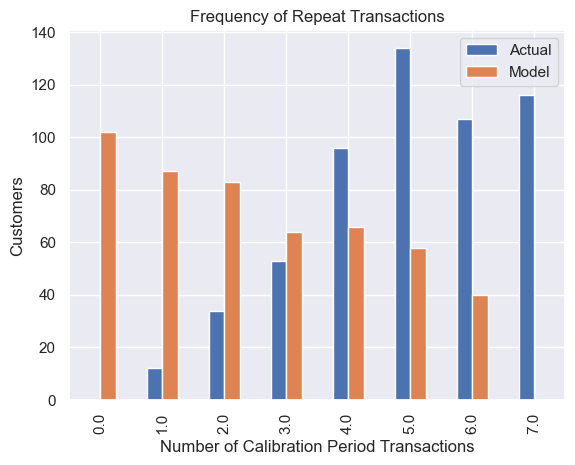

In [49]:
from lifetimes.plotting import plot_period_transactions


plot_period_transactions(bgf)

In [50]:
#3 months' prediction
cltv_df["exp_sales_3_month"] = bgf.predict(12,
                                           cltv_df["AvgFrequency"],
                                           cltv_df["Recency_Weekly"],
                                           cltv_df["Tenure_Weekly"])

In [51]:
cltv_df.sort_values("exp_sales_3_month", ascending=False).head(10) 

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly,FinalAvgMonetary,exp_sales_3_month
515,MH-18115,2016-08-23,2017-12-25,489,496,17,7,9,240,5291,5258,115676,198,4375,5,5,5,22,484,NaN,NaN,16.30,0,423.72,16.30,16.53,69.86,70.86,486.11,1.24
694,SJ-20125,2015-09-22,2017-09-26,735,832,28,97,12,145,3495,3469,83256,118,2848,3,5,5,24,576,NaN,NaN,24.50,0,304.97,24.50,27.73,105.00,118.86,237.33,1.08
184,CV-12805,2016-05-09,2017-12-25,595,602,20,7,9,124,2372,2355,44745,99,1897,5,5,3,19,361,NaN,NaN,19.83,0,163.90,19.83,20.07,85.00,86.00,210.78,1.08
140,CD-12280,2017-11-05,2017-11-18,13,57,2,44,2,92,1208,1197,15561,84,1094,4,1,2,13,169,NaN,NaN,0.43,0,57.00,0.43,1.90,1.86,8.14,547.00,1.07
275,EP-13915,2014-07-06,2017-12-18,1261,1275,42,14,17,176,5482,5438,168578,139,4313,5,5,5,31,961,NaN,NaN,42.03,0,617.50,42.03,42.50,180.14,182.14,253.71,1.04
67,BD-11320,2015-05-31,2017-11-27,911,946,32,35,12,207,3945,3922,74518,183,3479,4,5,5,19,361,NaN,NaN,30.37,0,272.96,30.37,31.53,130.14,135.14,289.92,0.97
521,ML-17755,2016-08-04,2017-12-01,484,515,17,31,7,159,2072,2047,26611,141,1839,4,4,3,13,169,NaN,NaN,16.13,0,97.48,16.13,17.17,69.14,73.57,262.71,0.97
157,CM-12160,2016-10-21,2017-12-04,409,437,15,28,6,212,1489,1479,10353,164,1148,4,3,2,7,49,NaN,NaN,13.63,0,37.92,13.63,14.57,58.43,62.43,191.33,0.95
723,SV-20935,2016-03-19,2017-12-28,649,653,22,4,8,146,1904,1881,24453,114,1494,5,4,3,13,169,NaN,NaN,21.63,0,89.57,21.63,21.77,92.71,93.29,186.75,0.91
691,SH-19975,2014-12-10,2017-12-01,1087,1118,37,31,13,117,3409,3366,97614,108,3160,4,5,5,29,841,NaN,NaN,36.23,0,357.56,36.23,37.27,155.29,159.71,243.08,0.91


In [52]:
#6 months' prediction
cltv_df["exp_sales_6_month"] = bgf.predict(24,
                                           cltv_df["AvgFrequency"],
                                           cltv_df["Recency_Weekly"],
                                           cltv_df["Tenure_Weekly"])

# 10 customers who we expected to bring most monetaries in 6 months
cltv_df.sort_values("exp_sales_6_month", ascending=False).head(10)

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly,FinalAvgMonetary,exp_sales_3_month,exp_sales_6_month
515,MH-18115,2016-08-23,2017-12-25,489,496,17,7,9,240,5291,5258,115676,198,4375,5,5,5,22,484,NaN,NaN,16.30,0,423.72,16.30,16.53,69.86,70.86,486.11,1.24,2.49
694,SJ-20125,2015-09-22,2017-09-26,735,832,28,97,12,145,3495,3469,83256,118,2848,3,5,5,24,576,NaN,NaN,24.50,0,304.97,24.50,27.73,105.00,118.86,237.33,1.08,2.16
184,CV-12805,2016-05-09,2017-12-25,595,602,20,7,9,124,2372,2355,44745,99,1897,5,5,3,19,361,NaN,NaN,19.83,0,163.90,19.83,20.07,85.00,86.00,210.78,1.08,2.15
140,CD-12280,2017-11-05,2017-11-18,13,57,2,44,2,92,1208,1197,15561,84,1094,4,1,2,13,169,NaN,NaN,0.43,0,57.00,0.43,1.90,1.86,8.14,547.00,1.07,2.13
275,EP-13915,2014-07-06,2017-12-18,1261,1275,42,14,17,176,5482,5438,168578,139,4313,5,5,5,31,961,NaN,NaN,42.03,0,617.50,42.03,42.50,180.14,182.14,253.71,1.04,2.08
67,BD-11320,2015-05-31,2017-11-27,911,946,32,35,12,207,3945,3922,74518,183,3479,4,5,5,19,361,NaN,NaN,30.37,0,272.96,30.37,31.53,130.14,135.14,289.92,0.97,1.94
521,ML-17755,2016-08-04,2017-12-01,484,515,17,31,7,159,2072,2047,26611,141,1839,4,4,3,13,169,NaN,NaN,16.13,0,97.48,16.13,17.17,69.14,73.57,262.71,0.97,1.94
157,CM-12160,2016-10-21,2017-12-04,409,437,15,28,6,212,1489,1479,10353,164,1148,4,3,2,7,49,NaN,NaN,13.63,0,37.92,13.63,14.57,58.43,62.43,191.33,0.95,1.91
723,SV-20935,2016-03-19,2017-12-28,649,653,22,4,8,146,1904,1881,24453,114,1494,5,4,3,13,169,NaN,NaN,21.63,0,89.57,21.63,21.77,92.71,93.29,186.75,0.91,1.82
691,SH-19975,2014-12-10,2017-12-01,1087,1118,37,31,13,117,3409,3366,97614,108,3160,4,5,5,29,841,NaN,NaN,36.23,0,357.56,36.23,37.27,155.29,159.71,243.08,0.91,1.81


In [53]:
# a months' prediction
cltv_df["exp_sales_1_month"] = bgf.predict(4,
                                           cltv_df["AvgFrequency"],
                                           cltv_df["Recency_Weekly"],
                                           cltv_df["Tenure_Weekly"])

#10 customers who we expected to bring most monetaries in a month
cltv_df.sort_values("exp_sales_1_month", ascending=False).head(10) 

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly,FinalAvgMonetary,exp_sales_3_month,exp_sales_6_month,exp_sales_1_month
515,MH-18115,2016-08-23,2017-12-25,489,496,17,7,9,240,5291,5258,115676,198,4375,5,5,5,22,484,NaN,NaN,16.30,0,423.72,16.30,16.53,69.86,70.86,486.11,1.24,2.49,0.41
694,SJ-20125,2015-09-22,2017-09-26,735,832,28,97,12,145,3495,3469,83256,118,2848,3,5,5,24,576,NaN,NaN,24.50,0,304.97,24.50,27.73,105.00,118.86,237.33,1.08,2.16,0.36
184,CV-12805,2016-05-09,2017-12-25,595,602,20,7,9,124,2372,2355,44745,99,1897,5,5,3,19,361,NaN,NaN,19.83,0,163.90,19.83,20.07,85.00,86.00,210.78,1.08,2.15,0.36
140,CD-12280,2017-11-05,2017-11-18,13,57,2,44,2,92,1208,1197,15561,84,1094,4,1,2,13,169,NaN,NaN,0.43,0,57.00,0.43,1.90,1.86,8.14,547.00,1.07,2.13,0.36
275,EP-13915,2014-07-06,2017-12-18,1261,1275,42,14,17,176,5482,5438,168578,139,4313,5,5,5,31,961,NaN,NaN,42.03,0,617.50,42.03,42.50,180.14,182.14,253.71,1.04,2.08,0.35
67,BD-11320,2015-05-31,2017-11-27,911,946,32,35,12,207,3945,3922,74518,183,3479,4,5,5,19,361,NaN,NaN,30.37,0,272.96,30.37,31.53,130.14,135.14,289.92,0.97,1.94,0.32
521,ML-17755,2016-08-04,2017-12-01,484,515,17,31,7,159,2072,2047,26611,141,1839,4,4,3,13,169,NaN,NaN,16.13,0,97.48,16.13,17.17,69.14,73.57,262.71,0.97,1.94,0.32
157,CM-12160,2016-10-21,2017-12-04,409,437,15,28,6,212,1489,1479,10353,164,1148,4,3,2,7,49,NaN,NaN,13.63,0,37.92,13.63,14.57,58.43,62.43,191.33,0.95,1.91,0.32
723,SV-20935,2016-03-19,2017-12-28,649,653,22,4,8,146,1904,1881,24453,114,1494,5,4,3,13,169,NaN,NaN,21.63,0,89.57,21.63,21.77,92.71,93.29,186.75,0.91,1.82,0.30
691,SH-19975,2014-12-10,2017-12-01,1087,1118,37,31,13,117,3409,3366,97614,108,3160,4,5,5,29,841,NaN,NaN,36.23,0,357.56,36.23,37.27,155.29,159.71,243.08,0.91,1.81,0.30


In [54]:
#Gamma-Gamma Model

ggf = GammaGammaFitter(penalizer_coef=0.02)
ggf.fit(cltv_df["AvgFrequency"], cltv_df["FinalAvgMonetary"])

<lifetimes.GammaGammaFitter: fitted with 793 subjects, p: 2.52, q: 0.28, v: 2.47>

In [55]:
cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df["AvgFrequency"],
                                                                             cltv_df["FinalAvgMonetary"])
cltv_df.head()

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly,FinalAvgMonetary,exp_sales_3_month,exp_sales_6_month,exp_sales_1_month,expected_average_profit
0,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,39.53,1,104.44,39.53,45.73,169.43,196.00,435.00,0.33,0.65,0.11,461.78
1,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,44.33,0,57.53,44.33,45.03,190.00,193.00,113.67,0.55,1.10,0.18,117.66
2,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,35.90,1,78.46,35.90,44.60,153.86,191.14,447.25,0.28,0.56,0.09,482.17
3,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,41.07,0,288.59,41.07,42.97,176.00,184.14,652.50,0.40,0.80,0.13,685.42
4,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,33.20,1,19.47,33.20,47.10,142.29,201.86,292.00,0.21,0.42,0.07,323.51


In [58]:
# CLTV Calculation for the next 6 months
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df["AvgFrequency"],
                                   cltv_df["Recency_Weekly"],
                                   cltv_df["Tenure_Weekly"],
                                   cltv_df["FinalAvgMonetary"],
                                   time=6,
                                   freq="W",
                                   discount_rate=0.01)

cltv_df["cltv"] = cltv
# 20 customers who has the most cltv values for the next 6 months 
cltv_df.sort_values("cltv", ascending=False).head(20)

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly,FinalAvgMonetary,exp_sales_3_month,exp_sales_6_month,exp_sales_1_month,expected_average_profit,cltv
742,TC-21145,2017-09-15,2017-09-15,0,108,4,108,1,259,1038,1035,4140,259,1038,2,1,2,4,16,NaN,NaN,0.00,0,15.16,0.00,3.60,0.00,15.43,1038.00,0.59,1.18,0.20,1454.32,1796.18
345,JC-15385,2017-07-08,2017-07-08,0,177,6,177,1,264,1057,1054,4216,263,1053,2,1,2,4,16,NaN,NaN,0.00,1,15.44,0.00,5.90,0.00,25.29,1053.00,0.48,0.95,0.16,1475.29,1471.49
140,CD-12280,2017-11-05,2017-11-18,13,57,2,44,2,92,1208,1197,15561,84,1094,4,1,2,13,169,NaN,NaN,0.43,0,57.00,0.43,1.90,1.86,8.14,547.00,1.07,2.13,0.36,639.18,1430.36
403,JR-15700,2017-10-23,2017-10-23,0,70,3,70,1,864,864,864,864,692,692,3,1,1,1,1,NaN,NaN,0.00,0,3.16,0.00,2.33,0.00,10.00,692.00,0.68,1.35,0.23,970.70,1379.95
515,MH-18115,2016-08-23,2017-12-25,489,496,17,7,9,240,5291,5258,115676,198,4375,5,5,5,22,484,NaN,NaN,16.30,0,423.72,16.30,16.53,69.86,70.86,486.11,1.24,2.49,0.41,502.27,1310.39
333,HW-14935,2015-09-27,2017-09-04,708,827,28,119,8,317,6343,6321,126420,302,6049,2,4,5,20,400,NaN,NaN,23.60,0,463.08,23.60,27.57,101.14,118.14,756.12,0.75,1.50,0.25,784.33,1237.67
146,CJ-12010,2016-03-10,2017-06-24,471,662,22,191,8,310,6212,6186,123720,242,4854,2,4,5,20,400,NaN,NaN,15.70,1,453.19,15.70,22.07,67.29,94.57,606.75,0.90,1.80,0.30,629.45,1187.54
235,DR-12880,2015-09-25,2017-12-27,824,829,28,5,9,271,6527,6487,155688,240,5770,5,5,5,24,576,NaN,NaN,27.47,0,570.29,27.47,27.63,117.71,118.43,641.11,0.83,1.67,0.28,662.33,1158.60
593,PH-18790,2017-10-21,2017-10-21,0,72,3,72,1,365,730,729,1458,292,585,3,1,1,2,4,NaN,NaN,0.00,0,5.34,0.00,2.40,0.00,10.29,585.00,0.67,1.34,0.22,821.14,1158.13
92,BM-11650,2014-07-09,2017-11-27,1237,1272,42,35,11,228,6622,6598,191342,223,6492,4,5,5,29,841,NaN,NaN,41.23,0,700.89,41.23,42.40,176.71,181.71,590.18,0.70,1.39,0.23,606.09,884.10


In [59]:
# CLTV Calculation for the next month
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df["AvgFrequency"],
                                   cltv_df["Recency_Weekly"],
                                   cltv_df["Tenure_Weekly"],
                                   cltv_df["FinalAvgMonetary"],
                                   time=1,
                                   freq="W",
                                   discount_rate=0.01)

cltv_df["cltv_1_ay"] = cltv
# 20 customers who has the most cltv values for the next month 
cltv_df.sort_values("cltv", ascending=False).head(20)

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly,FinalAvgMonetary,exp_sales_3_month,exp_sales_6_month,exp_sales_1_month,expected_average_profit,cltv,cltv_1_ay
742,TC-21145,2017-09-15,2017-09-15,0,108,4,108,1,259,1038,1035,4140,259,1038,2,1,2,4,16,NaN,NaN,0.00,0,15.16,0.00,3.60,0.00,15.43,1038.00,0.59,1.18,0.20,1454.32,1796.18,306.86
345,JC-15385,2017-07-08,2017-07-08,0,177,6,177,1,264,1057,1054,4216,263,1053,2,1,2,4,16,NaN,NaN,0.00,1,15.44,0.00,5.90,0.00,25.29,1053.00,0.48,0.95,0.16,1475.29,1471.49,251.39
140,CD-12280,2017-11-05,2017-11-18,13,57,2,44,2,92,1208,1197,15561,84,1094,4,1,2,13,169,NaN,NaN,0.43,0,57.00,0.43,1.90,1.86,8.14,547.00,1.07,2.13,0.36,639.18,1430.36,244.36
403,JR-15700,2017-10-23,2017-10-23,0,70,3,70,1,864,864,864,864,692,692,3,1,1,1,1,NaN,NaN,0.00,0,3.16,0.00,2.33,0.00,10.00,692.00,0.68,1.35,0.23,970.70,1379.95,235.75
515,MH-18115,2016-08-23,2017-12-25,489,496,17,7,9,240,5291,5258,115676,198,4375,5,5,5,22,484,NaN,NaN,16.30,0,423.72,16.30,16.53,69.86,70.86,486.11,1.24,2.49,0.41,502.27,1310.39,223.87
333,HW-14935,2015-09-27,2017-09-04,708,827,28,119,8,317,6343,6321,126420,302,6049,2,4,5,20,400,NaN,NaN,23.60,0,463.08,23.60,27.57,101.14,118.14,756.12,0.75,1.50,0.25,784.33,1237.67,211.44
146,CJ-12010,2016-03-10,2017-06-24,471,662,22,191,8,310,6212,6186,123720,242,4854,2,4,5,20,400,NaN,NaN,15.70,1,453.19,15.70,22.07,67.29,94.57,606.75,0.90,1.80,0.30,629.45,1187.54,202.88
235,DR-12880,2015-09-25,2017-12-27,824,829,28,5,9,271,6527,6487,155688,240,5770,5,5,5,24,576,NaN,NaN,27.47,0,570.29,27.47,27.63,117.71,118.43,641.11,0.83,1.67,0.28,662.33,1158.60,197.94
593,PH-18790,2017-10-21,2017-10-21,0,72,3,72,1,365,730,729,1458,292,585,3,1,1,2,4,NaN,NaN,0.00,0,5.34,0.00,2.40,0.00,10.29,585.00,0.67,1.34,0.22,821.14,1158.13,197.85
92,BM-11650,2014-07-09,2017-11-27,1237,1272,42,35,11,228,6622,6598,191342,223,6492,4,5,5,29,841,NaN,NaN,41.23,0,700.89,41.23,42.40,176.71,181.71,590.18,0.70,1.39,0.23,606.09,884.10,151.04


In [60]:
# CLTV Calculation for the next 3 months
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df["AvgFrequency"],
                                   cltv_df["Recency_Weekly"],
                                   cltv_df["Tenure_Weekly"],
                                   cltv_df["FinalAvgMonetary"],
                                   time=3,
                                   freq="W",
                                   discount_rate=0.01)

cltv_df["cltv_3_ay"] = cltv
# 20 customers who has the most cltv values for the next 3 months 
cltv_df.sort_values("cltv", ascending=False).head(20)

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly,FinalAvgMonetary,exp_sales_3_month,exp_sales_6_month,exp_sales_1_month,expected_average_profit,cltv,cltv_1_ay,cltv_3_ay
742,TC-21145,2017-09-15,2017-09-15,0,108,4,108,1,259,1038,1035,4140,259,1038,2,1,2,4,16,NaN,NaN,0.00,0,15.16,0.00,3.60,0.00,15.43,1038.00,0.59,1.18,0.20,1454.32,1796.18,306.86,911.49
345,JC-15385,2017-07-08,2017-07-08,0,177,6,177,1,264,1057,1054,4216,263,1053,2,1,2,4,16,NaN,NaN,0.00,1,15.44,0.00,5.90,0.00,25.29,1053.00,0.48,0.95,0.16,1475.29,1471.49,251.39,746.72
140,CD-12280,2017-11-05,2017-11-18,13,57,2,44,2,92,1208,1197,15561,84,1094,4,1,2,13,169,NaN,NaN,0.43,0,57.00,0.43,1.90,1.86,8.14,547.00,1.07,2.13,0.36,639.18,1430.36,244.36,725.85
403,JR-15700,2017-10-23,2017-10-23,0,70,3,70,1,864,864,864,864,692,692,3,1,1,1,1,NaN,NaN,0.00,0,3.16,0.00,2.33,0.00,10.00,692.00,0.68,1.35,0.23,970.70,1379.95,235.75,700.27
515,MH-18115,2016-08-23,2017-12-25,489,496,17,7,9,240,5291,5258,115676,198,4375,5,5,5,22,484,NaN,NaN,16.30,0,423.72,16.30,16.53,69.86,70.86,486.11,1.24,2.49,0.41,502.27,1310.39,223.87,664.97
333,HW-14935,2015-09-27,2017-09-04,708,827,28,119,8,317,6343,6321,126420,302,6049,2,4,5,20,400,NaN,NaN,23.60,0,463.08,23.60,27.57,101.14,118.14,756.12,0.75,1.50,0.25,784.33,1237.67,211.44,628.07
146,CJ-12010,2016-03-10,2017-06-24,471,662,22,191,8,310,6212,6186,123720,242,4854,2,4,5,20,400,NaN,NaN,15.70,1,453.19,15.70,22.07,67.29,94.57,606.75,0.90,1.80,0.30,629.45,1187.54,202.88,602.63
235,DR-12880,2015-09-25,2017-12-27,824,829,28,5,9,271,6527,6487,155688,240,5770,5,5,5,24,576,NaN,NaN,27.47,0,570.29,27.47,27.63,117.71,118.43,641.11,0.83,1.67,0.28,662.33,1158.60,197.94,587.95
593,PH-18790,2017-10-21,2017-10-21,0,72,3,72,1,365,730,729,1458,292,585,3,1,1,2,4,NaN,NaN,0.00,0,5.34,0.00,2.40,0.00,10.29,585.00,0.67,1.34,0.22,821.14,1158.13,197.85,587.71
92,BM-11650,2014-07-09,2017-11-27,1237,1272,42,35,11,228,6622,6598,191342,223,6492,4,5,5,29,841,NaN,NaN,41.23,0,700.89,41.23,42.40,176.71,181.71,590.18,0.70,1.39,0.23,606.09,884.10,151.04,448.65


In [61]:
cltv_df.drop(columns='exp_sales_3_month', inplace = True)
cltv_df.drop(columns='exp_sales_6_month', inplace = True)
cltv_df.drop(columns='cltv', inplace = True)
cltv_df.drop(columns='cltv_3_ay', inplace = True)

In [62]:
cltv_df.head()

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly,FinalAvgMonetary,exp_sales_1_month,expected_average_profit,cltv_1_ay
0,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,39.53,1,104.44,39.53,45.73,169.43,196.00,435.00,0.11,461.78,53.97
1,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,44.33,0,57.53,44.33,45.03,190.00,193.00,113.67,0.18,117.66,23.19
2,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,35.90,1,78.46,35.90,44.60,153.86,191.14,447.25,0.09,482.17,48.05
3,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,41.07,0,288.59,41.07,42.97,176.00,184.14,652.50,0.13,685.42,98.66
4,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,33.20,1,19.47,33.20,47.10,142.29,201.86,292.00,0.07,323.51,24.62


In [63]:
cltv_df.to_excel('cltv_prediction_final.xlsx', index=False)  

In [64]:
cltv_df.head()

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly,FinalAvgMonetary,exp_sales_1_month,expected_average_profit,cltv_1_ay
0,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,39.53,1,104.44,39.53,45.73,169.43,196.00,435.00,0.11,461.78,53.97
1,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,44.33,0,57.53,44.33,45.03,190.00,193.00,113.67,0.18,117.66,23.19
2,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,35.90,1,78.46,35.90,44.60,153.86,191.14,447.25,0.09,482.17,48.05
3,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,41.07,0,288.59,41.07,42.97,176.00,184.14,652.50,0.13,685.42,98.66
4,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,33.20,1,19.47,33.20,47.10,142.29,201.86,292.00,0.07,323.51,24.62


# K-MEANS CLUSTERING ALGORITHMS FOR CLTV


### I've used K-Means clustering algorithm to group customers according to their CLTV values

In [65]:
cltv_df.shape

(793, 32)

In [66]:
cltv_df.columns

Index(['CustomerID', 'FirstOrderDate', 'LastOrderDate', 'CustomerOrderDayDiff', 'AvgTenure', 'AvgTenureMonth', 'AvgRecency', 'AvgFrequency', 'AvgSales', 'TotalSales', 'AvgMonetary', 'TotalMonetary', 'AvgRevenue', 'TotalRevenue', 'RS', 'FS', 'MS', 'AvgBasketSize', 'TotalBasketSize', 'Unnamed: 19', '  ', 'Recency_Monthly', 'Churn', 'LTV', 'recency_cltv_monthly', 'Tenure_Monthly', 'Recency_Weekly',
       'Tenure_Weekly', 'FinalAvgMonetary', 'exp_sales_1_month', 'expected_average_profit', 'cltv_1_ay'],
      dtype='object')

In [67]:
cltv_df.index=cltv_df["CustomerID"]
cltv_df.head()

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly,FinalAvgMonetary,exp_sales_1_month,expected_average_profit,cltv_1_ay
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA-10315,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,39.53,1,104.44,39.53,45.73,169.43,196.00,435.00,0.11,461.78,53.97
AA-10375,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,44.33,0,57.53,44.33,45.03,190.00,193.00,113.67,0.18,117.66,23.19
AA-10480,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,35.90,1,78.46,35.90,44.60,153.86,191.14,447.25,0.09,482.17,48.05
AA-10645,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,41.07,0,288.59,41.07,42.97,176.00,184.14,652.50,0.13,685.42,98.66
AB-10015,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,33.20,1,19.47,33.20,47.10,142.29,201.86,292.00,0.07,323.51,24.62


In [68]:
cltv_df.drop(columns='CustomerID', inplace=True)

In [69]:
cltv_df.head()


,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly,FinalAvgMonetary,exp_sales_1_month,expected_average_profit,cltv_1_ay
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,39.53,1,104.44,39.53,45.73,169.43,196.00,435.00,0.11,461.78,53.97
AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,44.33,0,57.53,44.33,45.03,190.00,193.00,113.67,0.18,117.66,23.19
AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,35.90,1,78.46,35.90,44.60,153.86,191.14,447.25,0.09,482.17,48.05
AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,41.07,0,288.59,41.07,42.97,176.00,184.14,652.50,0.13,685.42,98.66
AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,33.20,1,19.47,33.20,47.10,142.29,201.86,292.00,0.07,323.51,24.62


In [70]:
 cltv_df.shape

(793, 31)

In [71]:
segment_data = cltv_df[["AvgTenure","AvgMonetary","AvgFrequency","AvgRecency","MS","FS","RS","expected_average_profit","cltv_1_ay","LTV"]]
segment_data.head()

,AvgTenure,AvgMonetary,AvgFrequency,AvgRecency,MS,FS,RS,expected_average_profit,cltv_1_ay,LTV
CustomerID,,,,,,,,,,
AA-10315,1372,2592,5,186,4,2,2,461.78,53.97,104.44
AA-10375,1351,1047,9,21,2,5,5,117.66,23.19,57.53
AA-10480,1338,1785,4,261,3,2,1,482.17,48.05,78.46
AA-10645,1289,4377,6,57,5,3,3,685.42,98.66,288.59
AB-10015,1413,886,3,417,1,1,1,323.51,24.62,19.47


In [72]:
segment_data.shape

(793, 10)

In [73]:
segment_data.dtypes

AvgTenure                    int64
AvgMonetary                  int64
AvgFrequency                 int64
AvgRecency                   int64
MS                           int64
FS                           int64
RS                           int64
expected_average_profit    float64
cltv_1_ay                  float64
LTV                        float64
dtype: object

In [74]:
K = range(2,12)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(segment_data)
    print("kume sayisi : ",k, kmeans.inertia_)

kume sayisi :  2 693962810.291812
kume sayisi :  3 368911339.11742824
kume sayisi :  4 264460308.71924806
kume sayisi :  5 200127895.2894015
kume sayisi :  6 169477174.10609883
kume sayisi :  7 149530875.00927553
kume sayisi :  8 135307963.88866612
kume sayisi :  9 122030181.44365196
kume sayisi :  10 113559144.76169765
kume sayisi :  11 106519680.45591432


Küme Sayısı: 2 693962810.2918118
Küme Sayısı: 3 368902465.84829265
Küme Sayısı: 4 264427474.34679222
Küme Sayısı: 5 200092065.7498003
Küme Sayısı: 6 169681705.0485788
Küme Sayısı: 7 149530875.00927556
Küme Sayısı: 8 135095560.2890366
Küme Sayısı: 9 121746418.8583744
Küme Sayısı: 10 113643992.5119297
Küme Sayısı: 11 106929781.97855516


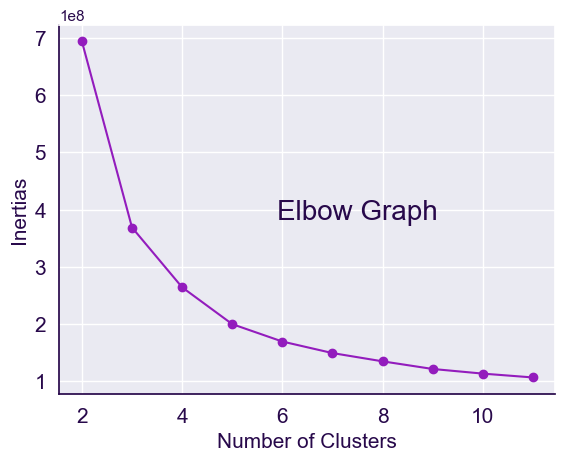

In [75]:
#kmeans = KMeans()
ssd = []
K = range(2, 12)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(segment_data)
    print("Küme Sayısı:",k,kmeans.inertia_)
    ssd.append(kmeans.inertia_)
    
    
    
#plt.plot(K, ssd, marker="o", color='#931CBD')
#plt.xlabel("Number of Clusters")
#plt.ylabel("Inertias")
#plt.title("Elbow Graph") 

#ax.spines['left'].set_color('orange')


fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(K, ssd, marker="o", color='#931CBD')
ax.set_xlabel("Number of Clusters",fontsize=15)
ax.set_ylabel("Inertias",fontsize=15)
ax.set_title("Elbow Graph",color='#28094B',fontsize=20,x=0.6,y=0.45) 

ax.spines['bottom'].set_color('#28094B')
ax.xaxis.label.set_color('#28094B')
ax.tick_params(axis='x', colors='#28094B')

ax.spines['left'].set_color('#28094B')
ax.yaxis.label.set_color('#28094B')
ax.tick_params(axis='y', colors='#28094B')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('my_plot.png', transparent=True) 


plt.show()      

In [76]:
cltv_df.head()

,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly,FinalAvgMonetary,exp_sales_1_month,expected_average_profit,cltv_1_ay
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,39.53,1,104.44,39.53,45.73,169.43,196.00,435.00,0.11,461.78,53.97
AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,44.33,0,57.53,44.33,45.03,190.00,193.00,113.67,0.18,117.66,23.19
AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,35.90,1,78.46,35.90,44.60,153.86,191.14,447.25,0.09,482.17,48.05
AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,41.07,0,288.59,41.07,42.97,176.00,184.14,652.50,0.13,685.42,98.66
AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,33.20,1,19.47,33.20,47.10,142.29,201.86,292.00,0.07,323.51,24.62


In [77]:
df.head()

,CustomerID,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV
0,AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,6.20,1,104.44
1,AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,0.70,0,57.53
2,AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,8.70,1,78.46
3,AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,1.90,0,288.59
4,AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,13.90,1,19.47


In [78]:
# 5 was the optimum cluster number so I've created 5 clusters
kmeans = KMeans(n_clusters=5).fit(segment_data)
segment_data["clusters"] = kmeans.labels_

In [79]:
segment_data.head()

,AvgTenure,AvgMonetary,AvgFrequency,AvgRecency,MS,FS,RS,expected_average_profit,cltv_1_ay,LTV,clusters
CustomerID,,,,,,,,,,,
AA-10315,1372,2592,5,186,4,2,2,461.78,53.97,104.44,0
AA-10375,1351,1047,9,21,2,5,5,117.66,23.19,57.53,3
AA-10480,1338,1785,4,261,3,2,1,482.17,48.05,78.46,1
AA-10645,1289,4377,6,57,5,3,3,685.42,98.66,288.59,4
AB-10015,1413,886,3,417,1,1,1,323.51,24.62,19.47,3


In [80]:
uniqueRFM = pd.read_excel(r"C:\Users\Yağız Esmerligil\Desktop\SuperStoreUniqueCustomer.xlsx")

In [81]:
df2_ = uniqueRFM.copy()

In [82]:
df2_.head()

,CustomerID,BasketSize,Recency,Tenure,TenureInMonths,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_SCORE,RFM_SCORE,SEGMENT
0,AA-10315,11,186,1372,46,5,2592,2,2,4,22,224,Hibernating
1,AA-10375,15,21,1351,45,9,1047,5,5,2,55,552,Champions
2,AA-10480,12,261,1338,44,4,1785,1,2,3,12,123,Hibernating
3,AA-10645,18,57,1289,43,6,4377,3,3,5,33,335,Need Attention
4,AB-10015,6,417,1413,47,3,886,1,1,1,11,111,Hibernating


In [83]:
df2_.index = df2_["CustomerID"]

In [84]:
df2_.head()

,CustomerID,BasketSize,Recency,Tenure,TenureInMonths,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_SCORE,RFM_SCORE,SEGMENT
CustomerID,,,,,,,,,,,,,
AA-10315,AA-10315,11,186,1372,46,5,2592,2,2,4,22,224,Hibernating
AA-10375,AA-10375,15,21,1351,45,9,1047,5,5,2,55,552,Champions
AA-10480,AA-10480,12,261,1338,44,4,1785,1,2,3,12,123,Hibernating
AA-10645,AA-10645,18,57,1289,43,6,4377,3,3,5,33,335,Need Attention
AB-10015,AB-10015,6,417,1413,47,3,886,1,1,1,11,111,Hibernating


In [85]:
#df2_.drop(columns="CustomerID",inplace=True)
df2_.shape

(793, 13)

In [86]:
df2_.head()

,CustomerID,BasketSize,Recency,Tenure,TenureInMonths,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_SCORE,RFM_SCORE,SEGMENT
CustomerID,,,,,,,,,,,,,
AA-10315,AA-10315,11,186,1372,46,5,2592,2,2,4,22,224,Hibernating
AA-10375,AA-10375,15,21,1351,45,9,1047,5,5,2,55,552,Champions
AA-10480,AA-10480,12,261,1338,44,4,1785,1,2,3,12,123,Hibernating
AA-10645,AA-10645,18,57,1289,43,6,4377,3,3,5,33,335,Need Attention
AB-10015,AB-10015,6,417,1413,47,3,886,1,1,1,11,111,Hibernating


In [87]:
df2_.shape

(793, 13)

In [88]:
segment_data.head()

,AvgTenure,AvgMonetary,AvgFrequency,AvgRecency,MS,FS,RS,expected_average_profit,cltv_1_ay,LTV,clusters
CustomerID,,,,,,,,,,,
AA-10315,1372,2592,5,186,4,2,2,461.78,53.97,104.44,0
AA-10375,1351,1047,9,21,2,5,5,117.66,23.19,57.53,3
AA-10480,1338,1785,4,261,3,2,1,482.17,48.05,78.46,1
AA-10645,1289,4377,6,57,5,3,3,685.42,98.66,288.59,4
AB-10015,1413,886,3,417,1,1,1,323.51,24.62,19.47,3


In [89]:
segmentation = df2_[["SEGMENT"]].merge(segment_data, on="CustomerID") #Table merging

In [90]:
segmentation.head()

,SEGMENT,AvgTenure,AvgMonetary,AvgFrequency,AvgRecency,MS,FS,RS,expected_average_profit,cltv_1_ay,LTV,clusters
CustomerID,,,,,,,,,,,,
AA-10315,Hibernating,1372,2592,5,186,4,2,2,461.78,53.97,104.44,0
AA-10375,Champions,1351,1047,9,21,2,5,5,117.66,23.19,57.53,3
AA-10480,Hibernating,1338,1785,4,261,3,2,1,482.17,48.05,78.46,1
AA-10645,Need Attention,1289,4377,6,57,5,3,3,685.42,98.66,288.59,4
AB-10015,Hibernating,1413,886,3,417,1,1,1,323.51,24.62,19.47,3


In [91]:
segmentation["CustomerID"] = segmentation.index

## Extra Analyses

In [92]:
segmentation.head()

,SEGMENT,AvgTenure,AvgMonetary,AvgFrequency,AvgRecency,MS,FS,RS,expected_average_profit,cltv_1_ay,LTV,clusters,CustomerID
CustomerID,,,,,,,,,,,,,
AA-10315,Hibernating,1372,2592,5,186,4,2,2,461.78,53.97,104.44,0,AA-10315
AA-10375,Champions,1351,1047,9,21,2,5,5,117.66,23.19,57.53,3,AA-10375
AA-10480,Hibernating,1338,1785,4,261,3,2,1,482.17,48.05,78.46,1,AA-10480
AA-10645,Need Attention,1289,4377,6,57,5,3,3,685.42,98.66,288.59,4,AA-10645
AB-10015,Hibernating,1413,886,3,417,1,1,1,323.51,24.62,19.47,3,AB-10015


In [93]:
segmentation.shape

(793, 13)

In [94]:
segmentation.to_excel('cltv_clusters_customerId.xlsx', index=False)

In [95]:
pd.crosstab(segmentation["SEGMENT"],segmentation["clusters"]) 

clusters,0,1,2,3,4
SEGMENT,,,,,
About To Sleep,16,18,0,23,1
At Risk,31,35,7,18,18
Can Not Lose,14,10,6,3,6
Champions,34,12,10,4,25
Hibernating,23,59,0,82,6
Loyal Customers,63,27,15,6,39
Need Attention,10,11,0,6,3
New Customers,3,4,0,11,0
Potential Loyalists,36,44,2,21,13


In [96]:
segmentation.isnull().sum()

SEGMENT                    0
AvgTenure                  0
AvgMonetary                0
AvgFrequency               0
AvgRecency                 0
MS                         0
FS                         0
RS                         0
expected_average_profit    0
cltv_1_ay                  0
LTV                        0
clusters                   0
CustomerID                 0
dtype: int64

In [97]:
segmentation["clusters"].value_counts()

clusters
0    233
1    224
3    185
4    111
2     40
Name: count, dtype: int64

In [98]:
cltv_df.head()

,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly,FinalAvgMonetary,exp_sales_1_month,expected_average_profit,cltv_1_ay
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,39.53,1,104.44,39.53,45.73,169.43,196.00,435.00,0.11,461.78,53.97
AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,44.33,0,57.53,44.33,45.03,190.00,193.00,113.67,0.18,117.66,23.19
AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,35.90,1,78.46,35.90,44.60,153.86,191.14,447.25,0.09,482.17,48.05
AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,41.07,0,288.59,41.07,42.97,176.00,184.14,652.50,0.13,685.42,98.66
AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,33.20,1,19.47,33.20,47.10,142.29,201.86,292.00,0.07,323.51,24.62


In [99]:
df2_.head()

,CustomerID,BasketSize,Recency,Tenure,TenureInMonths,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_SCORE,RFM_SCORE,SEGMENT
CustomerID,,,,,,,,,,,,,
AA-10315,AA-10315,11,186,1372,46,5,2592,2,2,4,22,224,Hibernating
AA-10375,AA-10375,15,21,1351,45,9,1047,5,5,2,55,552,Champions
AA-10480,AA-10480,12,261,1338,44,4,1785,1,2,3,12,123,Hibernating
AA-10645,AA-10645,18,57,1289,43,6,4377,3,3,5,33,335,Need Attention
AB-10015,AB-10015,6,417,1413,47,3,886,1,1,1,11,111,Hibernating


In [100]:
segment_data.head()

,AvgTenure,AvgMonetary,AvgFrequency,AvgRecency,MS,FS,RS,expected_average_profit,cltv_1_ay,LTV,clusters
CustomerID,,,,,,,,,,,
AA-10315,1372,2592,5,186,4,2,2,461.78,53.97,104.44,0
AA-10375,1351,1047,9,21,2,5,5,117.66,23.19,57.53,3
AA-10480,1338,1785,4,261,3,2,1,482.17,48.05,78.46,1
AA-10645,1289,4377,6,57,5,3,3,685.42,98.66,288.59,4
AB-10015,1413,886,3,417,1,1,1,323.51,24.62,19.47,3


In [101]:
segmentation.head()

,SEGMENT,AvgTenure,AvgMonetary,AvgFrequency,AvgRecency,MS,FS,RS,expected_average_profit,cltv_1_ay,LTV,clusters,CustomerID
CustomerID,,,,,,,,,,,,,
AA-10315,Hibernating,1372,2592,5,186,4,2,2,461.78,53.97,104.44,0,AA-10315
AA-10375,Champions,1351,1047,9,21,2,5,5,117.66,23.19,57.53,3,AA-10375
AA-10480,Hibernating,1338,1785,4,261,3,2,1,482.17,48.05,78.46,1,AA-10480
AA-10645,Need Attention,1289,4377,6,57,5,3,3,685.42,98.66,288.59,4,AA-10645
AB-10015,Hibernating,1413,886,3,417,1,1,1,323.51,24.62,19.47,3,AB-10015


In [102]:
segmentation["clusters"].values

array([0, 3, 1, 4, 3, 0, 2, 3, 1, 3, 1, 3, 4, 0, 3, 4, 1, 3, 0, 3, 3, 3,
       0, 1, 1, 3, 4, 1, 0, 1, 1, 4, 0, 3, 2, 4, 4, 4, 1, 3, 3, 2, 3, 1,
       4, 3, 1, 3, 0, 3, 4, 0, 0, 3, 4, 3, 1, 3, 1, 0, 3, 0, 3, 1, 3, 4,
       0, 4, 0, 3, 0, 1, 3, 1, 3, 0, 1, 1, 3, 1, 0, 3, 2, 1, 3, 0, 1, 3,
       2, 3, 4, 3, 2, 1, 3, 1, 1, 3, 3, 0, 1, 4, 1, 0, 0, 4, 0, 0, 0, 3,
       1, 1, 3, 3, 0, 0, 1, 3, 0, 1, 0, 1, 0, 1, 0, 2, 1, 4, 1, 1, 4, 0,
       0, 1, 3, 0, 0, 0, 1, 3, 1, 1, 3, 1, 1, 3, 2, 0, 0, 0, 1, 1, 2, 1,
       1, 3, 1, 1, 1, 1, 0, 3, 4, 4, 1, 0, 4, 1, 3, 1, 1, 1, 3, 0, 3, 3,
       0, 0, 4, 3, 3, 0, 0, 0, 0, 1, 0, 3, 0, 0, 4, 0, 0, 4, 1, 1, 4, 1,
       1, 0, 1, 3, 1, 1, 0, 4, 3, 1, 1, 0, 0, 4, 1, 0, 3, 4, 0, 1, 0, 1,
       3, 0, 3, 1, 4, 0, 1, 0, 1, 1, 3, 0, 1, 4, 1, 2, 4, 1, 0, 1, 4, 1,
       4, 3, 1, 0, 0, 0, 1, 0, 3, 1, 0, 1, 3, 1, 1, 2, 3, 3, 1, 0, 3, 0,
       0, 1, 3, 0, 0, 3, 3, 3, 4, 3, 1, 2, 1, 0, 4, 0, 0, 0, 1, 4, 0, 4,
       0, 0, 0, 0, 4, 3, 4, 1, 1, 4, 1, 0, 0, 1, 1,

In [103]:
segmentation.describe().T

,count,mean,std,min,25%,50%,75%,max
AvgTenure,793.00,1148.45,254.66,57.00,1097.00,1207.00,1331.00,1459.00
AvgMonetary,793.00,2197.13,1433.84,3.00,1116.00,1995.00,2925.00,7870.00
AvgFrequency,793.00,6.32,2.55,1.00,5.00,6.00,8.00,17.00
AvgRecency,793.00,148.80,186.21,2.00,32.00,77.00,185.00,1167.00
MS,793.00,3.00,1.41,1.00,2.00,3.00,4.00,5.00
FS,793.00,3.00,1.41,1.00,2.00,3.00,4.00,5.00
RS,793.00,3.00,1.41,1.00,2.00,3.00,4.00,5.00
expected_average_profit,793.00,320.11,191.16,3.77,182.61,288.94,419.65,1475.29
cltv_1_ay,793.00,54.29,36.64,0.32,28.86,48.41,71.38,306.86
LTV,793.00,125.97,135.95,0.01,35.08,84.78,172.09,922.49


In [104]:
segmentation.head()

,SEGMENT,AvgTenure,AvgMonetary,AvgFrequency,AvgRecency,MS,FS,RS,expected_average_profit,cltv_1_ay,LTV,clusters,CustomerID
CustomerID,,,,,,,,,,,,,
AA-10315,Hibernating,1372,2592,5,186,4,2,2,461.78,53.97,104.44,0,AA-10315
AA-10375,Champions,1351,1047,9,21,2,5,5,117.66,23.19,57.53,3,AA-10375
AA-10480,Hibernating,1338,1785,4,261,3,2,1,482.17,48.05,78.46,1,AA-10480
AA-10645,Need Attention,1289,4377,6,57,5,3,3,685.42,98.66,288.59,4,AA-10645
AB-10015,Hibernating,1413,886,3,417,1,1,1,323.51,24.62,19.47,3,AB-10015


In [105]:
segmentation.groupby(["clusters"]).agg({"LTV":["mean"],"expected_average_profit":["mean"],"cltv_1_ay":["mean"]})

,LTV,expected_average_profit,cltv_1_ay
,mean,mean,mean
clusters,,,
0,141.83,363.77,62.00
1,59.76,292.75,44.27
2,535.77,575.90,130.74
3,17.79,147.92,19.83
4,258.90,478.49,88.21


In [106]:
cltv_detailed_customer = pd.read_excel(r"C:\Users\Yağız Esmerligil\Desktop\SuperStoreDetailedCustomer.xlsx") 

In [107]:
cltv_detailed_customer.head()

,OrderID,OrderDate,ShipmentDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub_Category,ProductName,Sales,Quantity,Discount,Profit,ThisOrdersDayDiff,OrderYear,Revenue,UnitPrice,CustomerID.1,BasketSize,Recency,Tenure,TenureInMonths,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_SCORE,RFM_SCORE,SEGMENT,Unnamed: 37,Unnamed: 38,,
0,CA-2014-100006,2014-09-07 00:00:00.000,2014-09-13 00:00:00.000,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,New York,10024,East,TEC-PH-10002075,Technology,Phones,AT&T EL51110 DECT,378,3,0,110,6,2014,378,126,DK-13375,23,21,1212,40,8,3287,5,4,5,54,545,Champions,NaN,NaN,NaN,NaN
1,CA-2014-100090,2014-07-08 00:00:00.000,2014-07-12 00:00:00.000,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,California,94122,West,FUR-TA-10003715,Furniture,Tables,Hon 2111 Invitation Series Corner Table,502,3,20,-53,4,2014,402,167,EB-13705,12,50,1273,42,9,3281,4,5,5,45,455,Loyal Customers,NaN,NaN,NaN,NaN
2,CA-2014-100090,2014-07-08 00:00:00.000,2014-07-12 00:00:00.000,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,California,94122,West,OFF-BI-10001597,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",197,6,20,69,4,2014,158,32,EB-13705,12,50,1273,42,9,3281,4,5,5,45,455,Loyal Customers,NaN,NaN,NaN,NaN
3,CA-2014-100293,2014-03-14 00:00:00.000,2014-03-18 00:00:00.000,Standard Class,NF-18475,Neil Franz?sisch,Home Office,United States,Jacksonville,Florida,32216,South,OFF-PA-10000176,Office Supplies,Paper,Xerox 1887,91,6,20,32,4,2014,73,15,NF-18475,4,527,1389,46,4,373,1,1,1,11,111,Hibernating,NaN,NaN,NaN,NaN
4,CA-2014-100328,2014-01-28 00:00:00.000,2014-02-03 00:00:00.000,Standard Class,JC-15340,Jasper Cacioppo,Consumer,United States,New York City,New York,10024,East,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",5,1,20,1,6,2014,4,5,JC-15340,4,116,1434,48,4,72,2,1,1,21,211,Hibernating,NaN,NaN,NaN,NaN


In [108]:
cltv_group_review  =  cltv_detailed_customer.copy()

In [109]:
cltv_group_review.head()

,OrderID,OrderDate,ShipmentDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub_Category,ProductName,Sales,Quantity,Discount,Profit,ThisOrdersDayDiff,OrderYear,Revenue,UnitPrice,CustomerID.1,BasketSize,Recency,Tenure,TenureInMonths,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_SCORE,RFM_SCORE,SEGMENT,Unnamed: 37,Unnamed: 38,,
0,CA-2014-100006,2014-09-07 00:00:00.000,2014-09-13 00:00:00.000,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,New York,10024,East,TEC-PH-10002075,Technology,Phones,AT&T EL51110 DECT,378,3,0,110,6,2014,378,126,DK-13375,23,21,1212,40,8,3287,5,4,5,54,545,Champions,NaN,NaN,NaN,NaN
1,CA-2014-100090,2014-07-08 00:00:00.000,2014-07-12 00:00:00.000,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,California,94122,West,FUR-TA-10003715,Furniture,Tables,Hon 2111 Invitation Series Corner Table,502,3,20,-53,4,2014,402,167,EB-13705,12,50,1273,42,9,3281,4,5,5,45,455,Loyal Customers,NaN,NaN,NaN,NaN
2,CA-2014-100090,2014-07-08 00:00:00.000,2014-07-12 00:00:00.000,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,California,94122,West,OFF-BI-10001597,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",197,6,20,69,4,2014,158,32,EB-13705,12,50,1273,42,9,3281,4,5,5,45,455,Loyal Customers,NaN,NaN,NaN,NaN
3,CA-2014-100293,2014-03-14 00:00:00.000,2014-03-18 00:00:00.000,Standard Class,NF-18475,Neil Franz?sisch,Home Office,United States,Jacksonville,Florida,32216,South,OFF-PA-10000176,Office Supplies,Paper,Xerox 1887,91,6,20,32,4,2014,73,15,NF-18475,4,527,1389,46,4,373,1,1,1,11,111,Hibernating,NaN,NaN,NaN,NaN
4,CA-2014-100328,2014-01-28 00:00:00.000,2014-02-03 00:00:00.000,Standard Class,JC-15340,Jasper Cacioppo,Consumer,United States,New York City,New York,10024,East,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",5,1,20,1,6,2014,4,5,JC-15340,4,116,1434,48,4,72,2,1,1,21,211,Hibernating,NaN,NaN,NaN,NaN


In [110]:
cltv_group_review.index  =  cltv_group_review["CustomerID"]  

In [111]:
cltv_group_review.head() 

,OrderID,OrderDate,ShipmentDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub_Category,ProductName,Sales,Quantity,Discount,Profit,ThisOrdersDayDiff,OrderYear,Revenue,UnitPrice,CustomerID.1,BasketSize,Recency,Tenure,TenureInMonths,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_SCORE,RFM_SCORE,SEGMENT,Unnamed: 37,Unnamed: 38,,
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DK-13375,CA-2014-100006,2014-09-07 00:00:00.000,2014-09-13 00:00:00.000,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,New York,10024,East,TEC-PH-10002075,Technology,Phones,AT&T EL51110 DECT,378,3,0,110,6,2014,378,126,DK-13375,23,21,1212,40,8,3287,5,4,5,54,545,Champions,NaN,NaN,NaN,NaN
EB-13705,CA-2014-100090,2014-07-08 00:00:00.000,2014-07-12 00:00:00.000,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,California,94122,West,FUR-TA-10003715,Furniture,Tables,Hon 2111 Invitation Series Corner Table,502,3,20,-53,4,2014,402,167,EB-13705,12,50,1273,42,9,3281,4,5,5,45,455,Loyal Customers,NaN,NaN,NaN,NaN
EB-13705,CA-2014-100090,2014-07-08 00:00:00.000,2014-07-12 00:00:00.000,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,California,94122,West,OFF-BI-10001597,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",197,6,20,69,4,2014,158,32,EB-13705,12,50,1273,42,9,3281,4,5,5,45,455,Loyal Customers,NaN,NaN,NaN,NaN
NF-18475,CA-2014-100293,2014-03-14 00:00:00.000,2014-03-18 00:00:00.000,Standard Class,NF-18475,Neil Franz?sisch,Home Office,United States,Jacksonville,Florida,32216,South,OFF-PA-10000176,Office Supplies,Paper,Xerox 1887,91,6,20,32,4,2014,73,15,NF-18475,4,527,1389,46,4,373,1,1,1,11,111,Hibernating,NaN,NaN,NaN,NaN
JC-15340,CA-2014-100328,2014-01-28 00:00:00.000,2014-02-03 00:00:00.000,Standard Class,JC-15340,Jasper Cacioppo,Consumer,United States,New York City,New York,10024,East,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",5,1,20,1,6,2014,4,5,JC-15340,4,116,1434,48,4,72,2,1,1,21,211,Hibernating,NaN,NaN,NaN,NaN


In [112]:
cltv_group_review.drop(columns="CustomerID",inplace=True)

In [113]:
cltv_group_review.head()

,OrderID,OrderDate,ShipmentDate,ShipMode,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub_Category,ProductName,Sales,Quantity,Discount,Profit,ThisOrdersDayDiff,OrderYear,Revenue,UnitPrice,CustomerID.1,BasketSize,Recency,Tenure,TenureInMonths,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_SCORE,RFM_SCORE,SEGMENT,Unnamed: 37,Unnamed: 38,,
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DK-13375,CA-2014-100006,2014-09-07 00:00:00.000,2014-09-13 00:00:00.000,Standard Class,Dennis Kane,Consumer,United States,New York City,New York,10024,East,TEC-PH-10002075,Technology,Phones,AT&T EL51110 DECT,378,3,0,110,6,2014,378,126,DK-13375,23,21,1212,40,8,3287,5,4,5,54,545,Champions,NaN,NaN,NaN,NaN
EB-13705,CA-2014-100090,2014-07-08 00:00:00.000,2014-07-12 00:00:00.000,Standard Class,Ed Braxton,Corporate,United States,San Francisco,California,94122,West,FUR-TA-10003715,Furniture,Tables,Hon 2111 Invitation Series Corner Table,502,3,20,-53,4,2014,402,167,EB-13705,12,50,1273,42,9,3281,4,5,5,45,455,Loyal Customers,NaN,NaN,NaN,NaN
EB-13705,CA-2014-100090,2014-07-08 00:00:00.000,2014-07-12 00:00:00.000,Standard Class,Ed Braxton,Corporate,United States,San Francisco,California,94122,West,OFF-BI-10001597,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",197,6,20,69,4,2014,158,32,EB-13705,12,50,1273,42,9,3281,4,5,5,45,455,Loyal Customers,NaN,NaN,NaN,NaN
NF-18475,CA-2014-100293,2014-03-14 00:00:00.000,2014-03-18 00:00:00.000,Standard Class,Neil Franz?sisch,Home Office,United States,Jacksonville,Florida,32216,South,OFF-PA-10000176,Office Supplies,Paper,Xerox 1887,91,6,20,32,4,2014,73,15,NF-18475,4,527,1389,46,4,373,1,1,1,11,111,Hibernating,NaN,NaN,NaN,NaN
JC-15340,CA-2014-100328,2014-01-28 00:00:00.000,2014-02-03 00:00:00.000,Standard Class,Jasper Cacioppo,Consumer,United States,New York City,New York,10024,East,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",5,1,20,1,6,2014,4,5,JC-15340,4,116,1434,48,4,72,2,1,1,21,211,Hibernating,NaN,NaN,NaN,NaN


In [122]:
num_columns = ["BasketSize","Recency","Tenure","TenureInMonths","Frequency","Monetary","RecencyScore","FrequencyScore","MonetaryScore"]
num_columns2 = ["Sales","Quantity","Discount","Profit","ThisOrdersDayDiff","OrderYear","Revenue","UnitPrice"]
financial_columns = ["expected_average_profit","cltv_1_ay","LTV"]

In [128]:
cat_columns = ["ShipMode","SEGMENT_x","SEGMENT_y","CustomerName","Segment","City","State","Region","Category","Sub_Category","ProductName"]

In [132]:
cltv_df.head() 

,FirstOrderDate,LastOrderDate,CustomerOrderDayDiff,AvgTenure,AvgTenureMonth,AvgRecency,AvgFrequency,AvgSales,TotalSales,AvgMonetary,TotalMonetary,AvgRevenue,TotalRevenue,RS,FS,MS,AvgBasketSize,TotalBasketSize,Unnamed: 19,,Recency_Monthly,Churn,LTV,recency_cltv_monthly,Tenure_Monthly,Recency_Weekly,Tenure_Weekly,FinalAvgMonetary,exp_sales_1_month,expected_average_profit,cltv_1_ay
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA-10315,2014-03-31,2017-06-29,1186,1372,46,186,5,235,2595,2592,28512,197,2175,2,2,4,11,121,NaN,,39.53,1,104.44,39.53,45.73,169.43,196.00,435.00,0.11,461.78,53.97
AA-10375,2014-04-21,2017-12-11,1330,1351,45,21,9,70,1056,1047,15705,68,1023,5,5,2,15,225,NaN,NaN,44.33,0,57.53,44.33,45.03,190.00,193.00,113.67,0.18,117.66,23.19
AA-10480,2014-05-04,2017-04-15,1077,1338,44,261,4,149,1792,1785,21420,149,1789,1,2,3,12,144,NaN,NaN,35.90,1,78.46,35.90,44.60,153.86,191.14,447.25,0.09,482.17,48.05
AA-10645,2014-06-22,2017-11-05,1232,1289,43,57,6,244,4398,4377,78786,217,3915,3,3,5,18,324,NaN,NaN,41.07,0,288.59,41.07,42.97,176.00,184.14,652.50,0.13,685.42,98.66
AB-10015,2014-02-18,2016-11-10,996,1413,47,417,3,147,887,886,5316,146,876,1,1,1,6,36,NaN,NaN,33.20,1,19.47,33.20,47.10,142.29,201.86,292.00,0.07,323.51,24.62
